# Transfer Learning Using ResNet50

### Car Brand Classification 

In [1]:
# Importing libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# resizing all the image to [224,224] as the model takes this size by default.
IMAGE_SIZE = [224,224]
# defining path
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [6]:
# Importing resnet50 model and preprocessing (added [3] for RGB channel.
resnet = ResNet50(input_shape = IMAGE_SIZE+[3], weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 18s 0us/step


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [8]:
# Not training weights / using existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [12]:
folders

['Datasets/Datasets/train\\audi',
 'Datasets/Datasets/train\\lamborghini',
 'Datasets/Datasets/train\\mercedes']

In [13]:
# adding flatten layer
x = Flatten()(resnet.output)

In [15]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = resnet.input, outputs= prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [17]:
# complining the model 
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [19]:
# Image Data Generator to import the images from the dataset.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
train_set = train_datagen.flow_from_directory('Datasets/Datasets/Train',
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/Test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [25]:
# Fitting the model.
history = model.fit_generator(train_set, 
                             validation_data = test_set,
                             epochs= 40,
                             steps_per_epoch = len(train_set),
                             validation_steps = len(test_set))

C:\Users\rckzs\AppData\Local\Temp\ipykernel_8356\3574800826.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set,


Epoch 1/40
2/2 [==============================] - 19s 10s/step - loss: 5.8194 - accuracy: 0.4219 - val_loss: 7.4042 - val_accuracy: 0.3276
Epoch 2/40
2/2 [==============================] - 9s 6s/step - loss: 5.8580 - accuracy: 0.3438 - val_loss: 5.5495 - val_accuracy: 0.5172
Epoch 3/40
2/2 [==============================] - 9s 7s/step - loss: 6.1206 - accuracy: 0.3125 - val_loss: 4.4849 - val_accuracy: 0.1552
Epoch 4/40
2/2 [==============================] - 10s 7s/step - loss: 3.2584 - accuracy: 0.3438 - val_loss: 2.0698 - val_accuracy: 0.3276
Epoch 5/40
2/2 [==============================] - 10s 7s/step - loss: 2.1202 - accuracy: 0.3906 - val_loss: 1.6773 - val_accuracy: 0.4655
Epoch 6/40
2/2 [==============================] - 10s 7s/step - loss: 1.6177 - accuracy: 0.5469 - val_loss: 1.7404 - val_accuracy: 0.5345
Epoch 7/40
2/2 [==============================] - 10s 7s/step - loss: 1.5026 - accuracy: 0.5625 - val_loss: 2.5444 - val_accuracy: 0.1724
Epoch 8/40
2/2 [===================

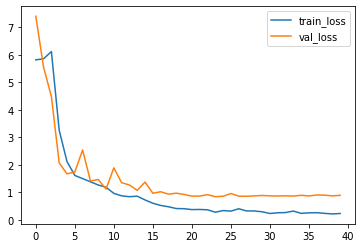

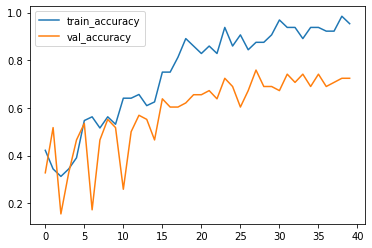

In [29]:
# plotting
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [31]:
# exporting the model
from tensorflow.keras.models import load_model
model.save('resnet50_tl.h5')

In [32]:
pred = model.predict(test_set)

2/2 [==============================] - 10s 2s/step


In [33]:
import numpy as np
pred = np.argmax(pred, axis = 1)

In [34]:
pred

array([1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [58]:
from tensorflow.keras.preprocessing import image
img = image.load_img('Datasets/Datasets/Test/mercedes/32.jpg',target_size = (224,224))

In [59]:
image_arr = image.img_to_array(img)

In [60]:
image_arr

array([[[ 81.,  67.,  18.],
        [ 80.,  66.,  17.],
        [ 78.,  64.,  15.],
        ...,
        [ 58.,  43.,  14.],
        [ 63.,  48.,  19.],
        [ 66.,  51.,  22.]],

       [[ 69.,  55.,   6.],
        [ 73.,  59.,  10.],
        [ 82.,  68.,  19.],
        ...,
        [ 66.,  51.,  22.],
        [ 71.,  56.,  27.],
        [ 74.,  59.,  30.]],

       [[ 69.,  55.,   6.],
        [ 73.,  59.,  10.],
        [ 82.,  68.,  19.],
        ...,
        [ 66.,  51.,  22.],
        [ 71.,  56.,  27.],
        [ 74.,  59.,  30.]],

       ...,

       [[109.,  83.,  56.],
        [125., 100.,  70.],
        [146., 121.,  91.],
        ...,
        [121., 101.,  77.],
        [123., 103.,  79.],
        [124., 104.,  80.]],

       [[109.,  83.,  56.],
        [125., 100.,  70.],
        [146., 121.,  91.],
        ...,
        [121., 101.,  77.],
        [123., 103.,  79.],
        [124., 104.,  80.]],

       [[129., 104.,  74.],
        [137., 112.,  81.],
        [133., 1

In [61]:
image_arr.shape

(224, 224, 3)

In [62]:
image_arr= image_arr/255

In [63]:
from tensorflow.keras.applications.resnet50 import preprocess_input
image_arr = np.expand_dims(image_arr, axis = 0)
image_data = preprocess_input(image_arr)
image_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(image_data)

1/1 [==============================] - 1s 1s/step


array([[6.5006490e-05, 2.1321393e-04, 9.9972171e-01]], dtype=float32)

In [67]:
rr = np.argmax(model.predict(image_data), axis=1)

1/1 [==============================] - 0s 165ms/step


In [68]:
rr

array([2], dtype=int64)

The result is class 2 ie mercedes which is correct.